 # Predicting Diabetes

In [1]:
from path import Path
import pandas as pd

In [2]:
data = Path('../Resources/diabetes.csv')
df = pd.read_csv(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 ## Separate the Features (X) from the Target (y)

In [7]:
y = df["Outcome"]
X = df.drop(columns="Outcome")

 ## Split our data into training and testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(576, 8)

 ## Create a Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',   max_iter=200, random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

 ## Fit (train) the model using the training data

In [13]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

 ## Score the model using the test data

In [14]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7829861111111112
Testing Data Score: 0.7760416666666666


 ## Make predictions

In [16]:
predictions = classifier.predict(X_test)
df_predict = pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [25]:
df_predict.head(20)

,Prediction,Actual
118,0,0
132,1,1
3,0,0
693,1,1
654,0,0
106,0,0
715,1,1
670,1,0
154,1,1
75,0,0


<AxesSubplot:>

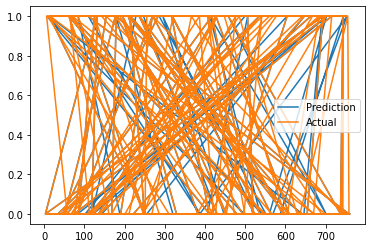

In [22]:
df_predict.plot()